## Feature Importance:
_If users upload data with a target column, allow them to run a feature importance analysis to determine which features/columns are the most influential in predicting the target._
- Feature importance analysis can provide users with insights into which columns (or features) in their data are most influential in predicting a target variable. This is especially useful when deciding which features to focus on or when trying to understand the underlying patterns in the data.

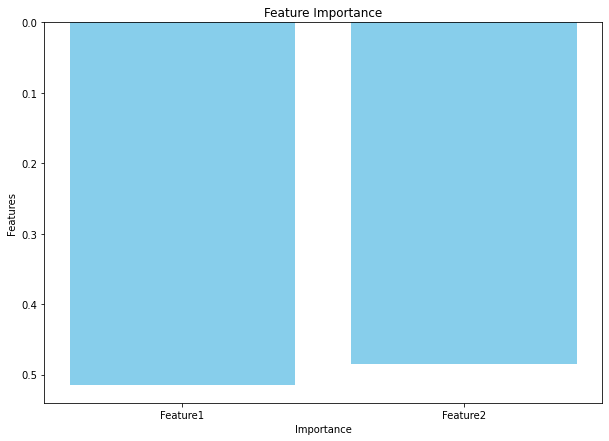

In [7]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import matplotlib.pyplot as plt

def get_feature_importance(df, target_column, algorithm="random_forest"):
    """
    Extracts feature importance using the specified algorithm.
    
    Args:
    - df (pandas.DataFrame): The input DataFrame.
    - target_column (str): The target column name.
    - algorithm (str): The algorithm to use for extracting feature importance.
    
    Returns:
    - dict: A dictionary with feature names as keys and their importance scores as values.
    """
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    if algorithm == "random_forest":
        model = RandomForestRegressor()
    elif algorithm == "decision_tree":
        model = DecisionTreeRegressor()
    elif algorithm == "gradient_boosting":
        model = GradientBoostingRegressor()
    else:
        raise ValueError("Unsupported algorithm. Choose 'random_forest', 'decision_tree', or 'gradient_boosting'.")
    
    model.fit(X, y)
    feature_importance = model.feature_importances_
    
    # Create a dictionary of feature names and their importance scores
    importance_dict = dict(zip(X.columns, feature_importance))
    
    return importance_dict

def visualize_feature_importance(importance_dict):
    """
    Visualizes the feature importance using a bar plot.
    
    Args:
    - importance_dict (dict): Dictionary with feature names as keys and their importance scores as values.
    
    Returns:
    - plt.figure: A bar plot visualizing the feature importance.
    """
    # Sort dictionary by importance
    sorted_importance = dict(sorted(importance_dict.items(), key=lambda item: item[1], reverse=True))
    
    plt.figure(figsize=(10, 7))
    plt.bar(list(sorted_importance.keys()), list(sorted_importance.values()), color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()  # Highest importance at the top
    return plt

# For demonstration purposes, let's create a sample dataframe and visualize feature importance
sample_data_for_importance = {
    'Feature1': [1, 5, 1.5, 8, 1, 9, 2, 8, 2, 9],
    'Feature2': [2, 8, 1.8, 8, 0.6, 11, 2.5, 6, 3, 10],
    'Target': [2.5, 6.5, 2.1, 8.3, 1.4, 9.6, 3, 7.2, 2.7, 9.5]
}
sample_df_for_importance = pd.DataFrame(sample_data_for_importance)

# Extract and visualize feature importance
importance_dict = get_feature_importance(sample_df_for_importance, 'Target', algorithm="random_forest")
visualize_feature_importance(importance_dict).show()
